In [57]:
import json
import pandas as pd
from bpemb import BPEmb
import swifter

import re

import pickle
import nltk
from nltk.corpus import stopwords

from collections import Counter
from textblob_de import TextBlobDE as TextBlob


import altair as alt
import pandas as pd

alt.renderers.enable('notebook')

stopwords = set(stopwords.words('german'))

RendererRegistry.enable('notebook')

# Preprocess

In [97]:
data = []

In [98]:
with open('/mnt/data/group07/johannes/other/de_companies_ocdata.jsonl') as f:
    for line in f:
        x = json.loads(line)
        data.append(x)

In [17]:
names = []
for d in data:
    names.append(d['name'])
    if not 'previous_names' in d:
        continue
    for pn in d['previous_names']:
        names.append(pn['company_name'])

In [18]:
names_u = list(set(names))

In [19]:
len(names_u)

6042513

In [20]:
df = pd.DataFrame({'name': names_u})

In [21]:
bpemb_de = BPEmb(lang="de", vs=200000)

In [22]:
df['name_proc'] = df['name'].swifter.apply(lambda x: bpemb_de.encode(x))

Pandas Apply: 100%|██████████| 6042513/6042513 [03:47<00:00, 26564.93it/s] 


In [23]:
df.to_pickle('df.pickle')

In [2]:
df = pd.read_pickle('df.pickle')

# Jahre im Name

In [3]:
res = []
for _, row in df.iterrows():
    nums = re.findall(r'\d+', row['name'])
    res += nums    

In [5]:
c_num = Counter(res)

In [33]:
data = sorted([x for x in c_num.most_common(10000000) if 1799 < int(x[0]) < 2019 and len(x[0]) == 4], key=lambda x: int(x[0]))

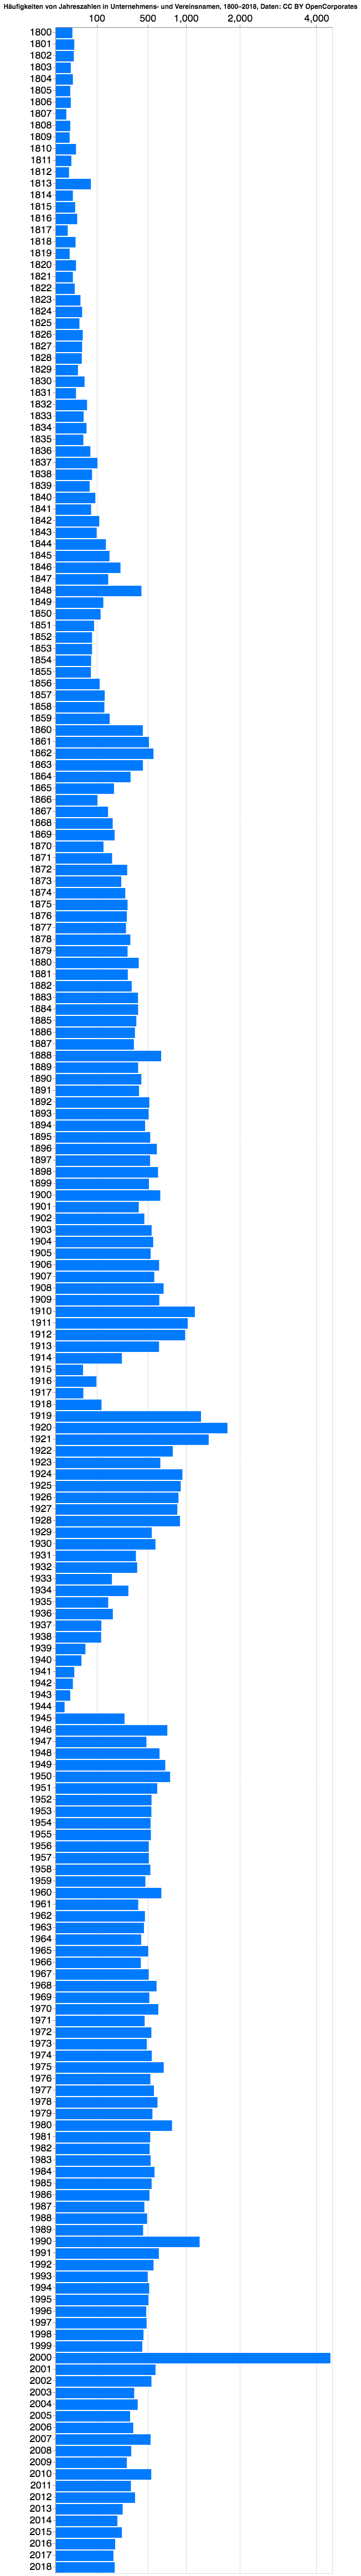

In [49]:
source = pd.DataFrame({
    'year': [d[0] for d in data],
    'num': [d[1] for d in data],
})

chart = alt.Chart(source, width=500).mark_bar(color='#007bff', fontSize=10).encode(
    x=alt.X('num', axis=alt.Axis(orient='top', title=None, values=[100, 500, 1000, 2000, 4000]), scale=alt.Scale(type='sqrt')),
    y=alt.Y('year', axis=alt.Axis(title=None)),
).properties(
    title='Häufigkeiten von Jahreszahlen in Unternehmens- und Vereinsnamen, 1800–2018, Daten: CC BY OpenCorporates'
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=18
)
chart

# Count Words

In [55]:
c = Counter()

for index, row in df.iterrows():
    c.update(row['name_proc'])

In [ ]:
pickle.dump(c, open('counter.pkl', 'wb'))

In [59]:
li = c.most_common(1000)

li = [[l[0].replace('▁', '') , l[1]] for l in li]

# for l in li:
#     res = lem.lemmatize(l[0])
#     if len(res) > 0:
#         l[0] = res[0][0]

li = [l for l in li if len(l[0]) > 2 and not '0' in l[0] and not l[0] in stopwords]

In [84]:
cc = Counter()

In [92]:
for l in li:
    added = False
    for ll in li:
        if l[0] == ll[0] + 's' or (l[0] == ll[0] + 'er' and ll[0][-1] == 't'):
            print(ll[0], l[0])
            cc[ll[0]] += l[1]
            added = True
#     if len(cc.keys()) > 0:
#         for x in process.extract(l[0], list(cc.keys()), limit=20):
#             if abs(len(x[0]) - len(l[0])) > 1:
#                 continue
#             if x[1] >= 90:
    if not added:
        cc[l[0]] += l[1]

beschränkt beschränkter
haftung haftungs
verwaltung verwaltungs
verwaltung verwaltungs
verwaltung verwaltungs
verwaltung verwaltungs
handel handels
handel handels
vertrieb vertriebs
vertrieb vertriebs
beratung beratungs
beratung beratungs
handel handels
handel handels
betrieb betriebs
unternehmen unternehmens
vertrieb vertriebs
vertrieb vertriebs
service services
service services
beratung beratungs
beratung beratungs
betrieb betriebs
wirtschaft wirtschafts
geschäft geschäfts
system systems
verlag verlags
verlag verlags
heizung heizungs
planung planungs
arbeit arbeits
vermittlung vermittlungs
vermittlung vermittlungs
entwicklung entwicklungs
entwicklung entwicklungs
betreuung betreuungs
vermittlung vermittlungs
vermittlung vermittlungs
partnerschaft partnerschafts
bau baus
bau baus
spedition speditions
leben lebens
deutsche deutsches
technologie technologies
sport sports
sport sports


In [93]:
data = cc.most_common(100)

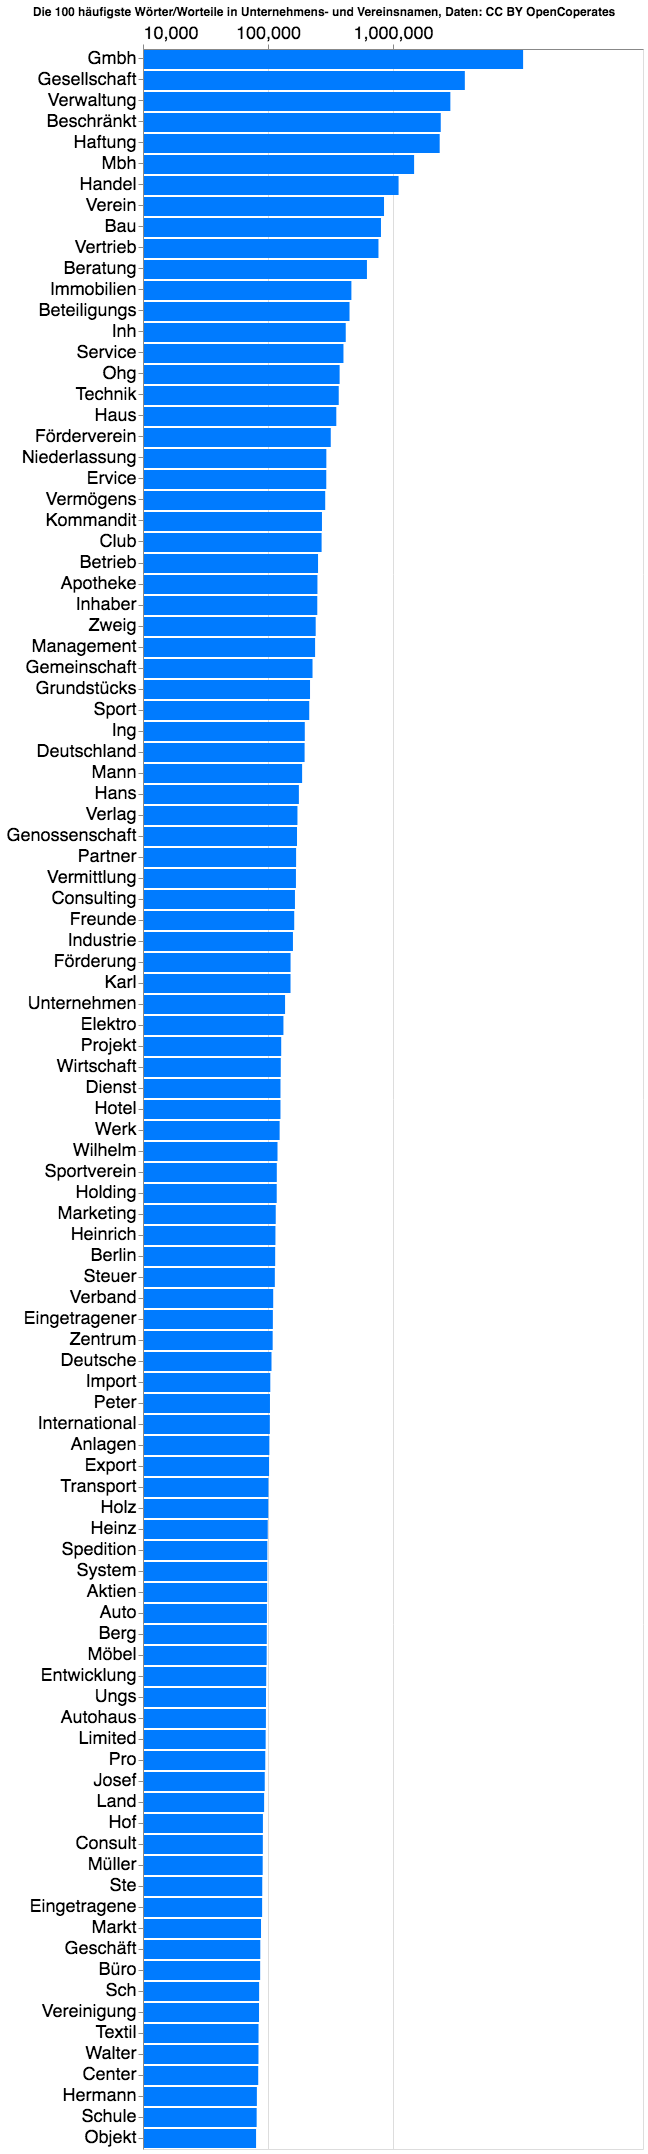

In [94]:
source = pd.DataFrame({
    'word': [d[0].title() for d in data],
    'num': [d[1] for d in data],
})

chart = alt.Chart(source, width=500).mark_bar(color='#007bff', fontSize=10).encode(
    x=alt.X('num', axis=alt.Axis(orient='top', title=None, values=[1000, 10000, 100000, 1000000]), scale=alt.Scale(type='log')),
    y=alt.Y('word', axis=alt.Axis(title=None), sort=None),
).properties(
    title='Die 100 häufigste Wörter/Worteile in Unternehmens- und Vereinsnamen, Daten: CC BY OpenCoperates'
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=18
)
chart

In [19]:
cc.most_common(1000)

[('gmbh', 2746463),
 ('gesellschaft', 938844),
 ('verwaltung', 719012),
 ('haftung', 590762),
 ('mbh', 368795),
 ('beschränkter', 355086),
 ('handel', 277020),
 ('beschränkt', 247448),
 ('verein', 211879),
 ('bau', 200301),
 ('vertrieb', 191254),
 ('service', 162130),
 ('beratung', 154679),
 ('immobilien', 116153),
 ('beteiligungs', 112218),
 ('inh', 104685),
 ('ohg', 93535),
 ('haus', 87962),
 ('förderverein', 79428),
 ('niederlassung', 73219),
 ('vermögens', 71705),
 ('technik', 71336),
 ('kommandit', 67545),
 ('club', 67103),
 ('betrieb', 62845),
 ('apotheke', 62138),
 ('inhaber', 61965),
 ('zweig', 60182),
 ('management', 59521),
 ('gemeinschaft', 56772),
 ('grundstücks', 54220),
 ('sport', 53435),
 ('ing', 49229),
 ('deutschland', 49059),
 ('mann', 46866),
 ('hans', 44151),
 ('verlag', 43000),
 ('genossenschaft', 42663),
 ('partner', 41953),
 ('vermittlung', 41823),
 ('consulting', 41075),
 ('freunde', 40521),
 ('industrie', 39582),
 ('förderung', 37879),
 ('karl', 37852),
 ('unte

In [33]:
df[df['name'].str.contains('thor')]['name'].values.tolist()

['Isothoro Immobilien und Bautensanierungs GmbH',
 'Wathory GmbH',
 'Fichthorn & Sohn',
 'Obere-Kunsthorn-Knopffabrikation Michael Sennefelder',
 'Sporthorses Gorski GmbH',
 'Jüthorn Apotheke Karl Göttner Pächter Gertrud Ohls',
 'Creathor Fund II Vermögensverwaltung GmbH & Co. KG',
 'GKM Glück Krämer Mäschke Pothorn Partnerschaft Wirtschaftsprüfungsgesellschaft',
 '"Ortsverein Rethorn"',
 'Gut Basthorst Event GmbH & Co. KG',
 'Ethority GmbH',
 'Sporthorses Baackmann GmbH',
 'Suthor Papierverarbeitung GmbH & Co KG',
 'Suthori Limited - Zweigniederlassung Deutschland',
 'Ryde Sporthorses GmbH',
 'Wathory Verwaltungs GmbH',
 'Schulte-Osthorst GmbH',
 'LIONS FÖRDERVEREIN Rendsburg-Königsthor e.V.',
 'Ralf Striethorst Facility Management Services e.K.',
 'Sängervereinigung "Klingendes Posthorn" e.V.',
 '"Zum Posthorn" Karl-Heinz Schumacher',
 'Autohaus Lichthorn GmbH',
 'HSO Hilmar Schulte-Osthorst GmbH',
 'Roland Hetzer International Cardiothoracic and Vascular Surgery Society (RH ICS) e.V

# Topic Modeling

In [2]:
import pyLDAvis.gensim
from gensim import corpora
import pickle
import gensim

/home/group7/anaconda3/envs/dev/lib/python3.7/site-packages/socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
/home/group7/anaconda3/envs/dev/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [20]:
lda_txt = df['name_proc'].values
lda_txt = [[t.replace('▁', '') for t in l] for l in lda_txt]

# for l in li:
#     res = lem.lemmatize(l[0])
#     if len(res) > 0:
#         l[0] = res[0][0]

# li = [l for l in li if len(l[0]) > 2 and not '0' in l[0] and not l[0] in stopwords]

In [24]:
lda_txt = [[t for t in l if len(t) > 2 and not t in stopwords] for l in lda_txt]

In [27]:
dictionary = corpora.Dictionary(lda_txt)
dictionary.filter_extremes(keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in lda_txt]

In [28]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [4]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
# lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [40]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=1)

In [41]:
ldamodel.save('model10.gensim')

In [38]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False, mds='mmds')

/home/group7/anaconda3/envs/dev/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [39]:
pyLDAvis.display(lda_display)

# Officier Names

In [100]:
data[0]

{'all_attributes': {'_registerArt': 'HRB',
  '_registerNummer': '150148',
  'additional_data': {'AD': True,
   'CD': True,
   'DK': True,
   'HD': False,
   'SI': True,
   'UT': True,
   'VÖ': False},
  'federal_state': 'Hamburg',
  'native_company_number': 'Hamburg HRB 150148',
  'registered_office': 'Hamburg',
  'registrar': 'Hamburg'},
 'company_number': 'K1101R_HRB150148',
 'current_status': 'currently registered',
 'jurisdiction_code': 'de',
 'name': 'olly UG (haftungsbeschränkt)',
 'officers': [{'name': 'Oliver Keunecke',
   'other_attributes': {'city': 'Hamburg',
    'firstname': 'Oliver',
    'flag': 'vertretungsberechtigt gemäß allgemeiner Vertretungsregelung',
    'lastname': 'Keunecke'},
   'position': 'Geschäftsführer',
   'start_date': '2018-02-06',
   'type': 'person'}],
 'registered_address': 'Waidmannstraße 1, 22769 Hamburg.',
 'retrieved_at': '2018-11-09T18:03:03Z'}

In [105]:
offis = []
for d in data:
    if not 'officers' in d:
        continue
    for pn in d['officers']:
        if 'other_attributes' in pn and 'firstname' in pn['other_attributes']:
            offis.append(pn['other_attributes']['firstname'])

In [107]:
len(offis)

4476440

In [108]:
c_fn = Counter(offis)

In [115]:
fn = pd.read_csv('https://raw.githubusercontent.com/MatthiasWinkelmann/firstname-database/master/firstnames.csv', sep=';')

In [133]:
fn[fn['name'] == 'Jan']

,name,gender,Great Britain,Ireland,U.S.A.,Italy,Malta,Portugal,Spain,France,...,"Kazakhstan/Uzbekistan,etc.",Turkey,Arabia/Persia,Israel,China,India/Sri Lanka,Japan,Korea,Vietnam,other countries
19100,Jan,F,-8.0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19101,Jan,?F,NaN,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19102,Jan,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19103,Jan,?M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
def get_gender(name):
    for _, row in fn[fn['name'] == name].iterrows():
        if pd.isna(row['Germany']):
            continue
        if 'f' in row['gender'].lower():
            return 'weibl.'
    return 'männl.'

In [153]:
for i, x in enumerate(c_fn.most_common(100)):
    if x[0] == 'Katja':
        print(i + 1, x)

61 ('Katja', 12051)


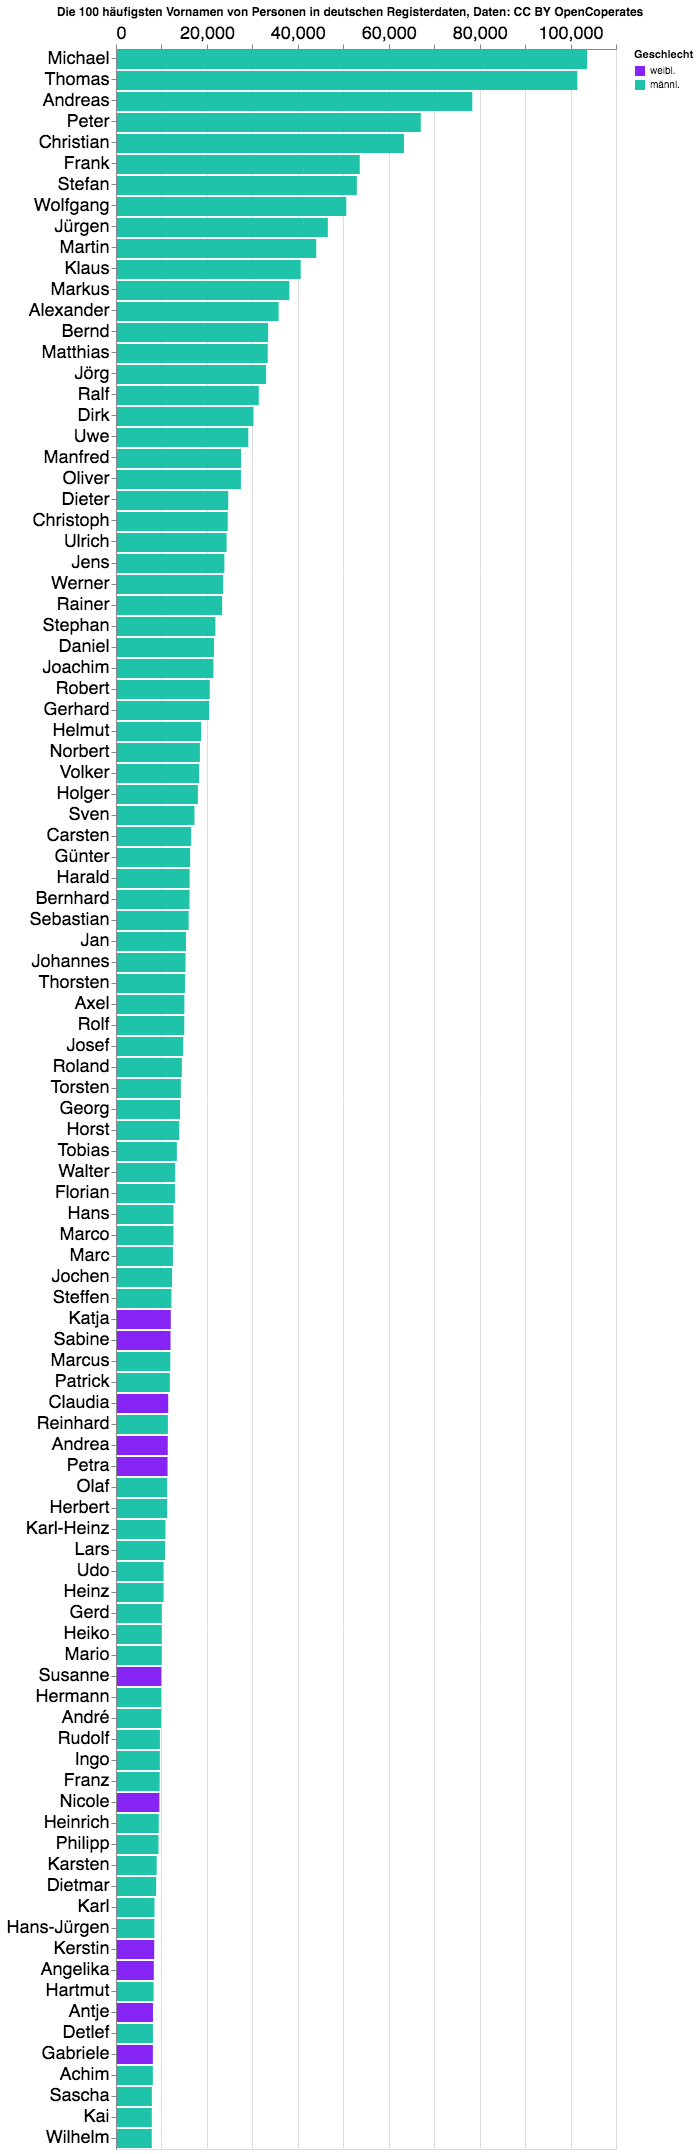

In [154]:
source = pd.DataFrame({
    'word': [d[0].title() for d in c_fn.most_common(100)],
    'num': [d[1] for d in c_fn.most_common(100)],
    'Geschlecht': [get_gender(d[0]) for d in c_fn.most_common(100)]
})

chart = alt.Chart(source, width=500).mark_bar(color='#007bff', fontSize=10).encode(
    x=alt.X('num', axis=alt.Axis(orient='top', title=None)),
    y=alt.Y('word', axis=alt.Axis(title=None), sort=None),
    color=alt.Color('Geschlecht',
                   scale=alt.Scale(
            domain=['weibl.', 'männl.'],
            range=['rgb(134, 36, 245)', 'rgb(31, 195, 170)']))
).properties(
    title='Die 100 häufigsten Vornamen von Personen in deutschen Registerdaten, Daten: CC BY OpenCoperates'
).configure_title(
    fontSize=12
).configure_axis(
    labelFontSize=18
)
chart